# Missing Value Handling

In [325]:
import pandas as pd

In [326]:
data = pd.read_csv('raw_data.csv')

In [327]:
data.sort_values('fl_date').tail()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
152158,2019-12-31,DL,DL,DL,1945,DL,N323US,1945,14107,PHX,...,1107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152157,2019-12-31,DL,DL,DL,1940,DL,N887DN,1940,14107,PHX,...,1107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152156,2019-12-31,DL,DL,DL,1913,DL,N913DU,1913,10397,ATL,...,270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152165,2019-12-31,DL,DL,DL,2366,DL,N685DA,2366,13204,MCO,...,404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152110,2019-12-31,AS,AS_CODESHARE,AS,3429,OO,N195SY,3429,14679,SAN,...,480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
df = data.copy()

In [330]:
dropcols = ['branded_code_share','mkt_carrier','tail_num','origin','dest','op_unique_carrier','op_carrier_fl_num','origin_airport_id','dest_airport_id','wheels_on','wheels_off','cancellation_code','dup','crs_elapsed_time','actual_elapsed_time','first_dep_time','total_add_gtime','longest_add_gtime','flights','no_name']

In [331]:
#drop irrelevant columns
df=df.drop(dropcols,axis=1)

In [332]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'origin_city_name', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time',
       'arr_delay', 'cancelled', 'diverted', 'air_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

In [333]:
df

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,...,arr_delay,cancelled,diverted,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-08-20,UA,3656,"Raleigh/Durham, NC","Newark, NJ",1535,1533.0,-2.0,17.0,9.0,...,-14.0,0.0,0.0,77.0,416.0,NaN,NaN,NaN,NaN,NaN
1,2018-08-20,UA,3723,"Denver, CO","Charlotte, NC",1000,955.0,-5.0,27.0,12.0,...,-13.0,0.0,0.0,163.0,1337.0,NaN,NaN,NaN,NaN,NaN
2,2018-08-20,AA,4686,"Philadelphia, PA","Oklahoma City, OK",2115,2118.0,3.0,21.0,17.0,...,-4.0,0.0,0.0,171.0,1261.0,NaN,NaN,NaN,NaN,NaN
3,2018-08-20,AA,4694,"Miami, FL","Key West, FL",2155,2149.0,-6.0,17.0,6.0,...,-6.0,0.0,0.0,32.0,125.0,NaN,NaN,NaN,NaN,NaN
4,2018-08-20,AA,2366,"Chicago, IL","Atlanta, GA",1850,1856.0,6.0,23.0,6.0,...,11.0,0.0,0.0,92.0,606.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318929,2018-08-20,WN,1193,"Omaha, NE","Las Vegas, NV",1650,1642.0,-8.0,7.0,3.0,...,-12.0,0.0,0.0,151.0,1099.0,NaN,NaN,NaN,NaN,NaN
318930,2018-08-20,WN,2299,"Ontario, CA","Denver, CO",635,635.0,0.0,8.0,8.0,...,-5.0,0.0,0.0,104.0,819.0,NaN,NaN,NaN,NaN,NaN
318931,2018-08-20,WN,791,"Ontario, CA","Phoenix, AZ",2120,2117.0,-3.0,6.0,7.0,...,-6.0,0.0,0.0,54.0,325.0,NaN,NaN,NaN,NaN,NaN
318932,2018-08-20,WN,1110,"Phoenix, AZ","Los Angeles, CA",1435,1435.0,0.0,36.0,5.0,...,9.0,0.0,0.0,53.0,370.0,NaN,NaN,NaN,NaN,NaN


In [334]:
df.shape

(318934, 22)

### Missing Values

In [335]:
#Missing Values
df.isna().sum()

fl_date                     0
mkt_unique_carrier          0
mkt_carrier_fl_num          0
origin_city_name            0
dest_city_name              0
crs_dep_time                0
dep_time                 5194
dep_delay                5286
taxi_out                 5470
taxi_in                  5631
crs_arr_time                0
arr_time                 5512
arr_delay                6185
cancelled                   0
diverted                    0
air_time                 6260
distance                    0
carrier_delay          258862
weather_delay          258862
nas_delay              258862
security_delay         258862
late_aircraft_delay    258862
dtype: int64

In [336]:
null_data = df[df.isnull().any(axis=1)]
null_data

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,...,arr_delay,cancelled,diverted,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-08-20,UA,3656,"Raleigh/Durham, NC","Newark, NJ",1535,1533.0,-2.0,17.0,9.0,...,-14.0,0.0,0.0,77.0,416.0,NaN,NaN,NaN,NaN,NaN
1,2018-08-20,UA,3723,"Denver, CO","Charlotte, NC",1000,955.0,-5.0,27.0,12.0,...,-13.0,0.0,0.0,163.0,1337.0,NaN,NaN,NaN,NaN,NaN
2,2018-08-20,AA,4686,"Philadelphia, PA","Oklahoma City, OK",2115,2118.0,3.0,21.0,17.0,...,-4.0,0.0,0.0,171.0,1261.0,NaN,NaN,NaN,NaN,NaN
3,2018-08-20,AA,4694,"Miami, FL","Key West, FL",2155,2149.0,-6.0,17.0,6.0,...,-6.0,0.0,0.0,32.0,125.0,NaN,NaN,NaN,NaN,NaN
4,2018-08-20,AA,2366,"Chicago, IL","Atlanta, GA",1850,1856.0,6.0,23.0,6.0,...,11.0,0.0,0.0,92.0,606.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318929,2018-08-20,WN,1193,"Omaha, NE","Las Vegas, NV",1650,1642.0,-8.0,7.0,3.0,...,-12.0,0.0,0.0,151.0,1099.0,NaN,NaN,NaN,NaN,NaN
318930,2018-08-20,WN,2299,"Ontario, CA","Denver, CO",635,635.0,0.0,8.0,8.0,...,-5.0,0.0,0.0,104.0,819.0,NaN,NaN,NaN,NaN,NaN
318931,2018-08-20,WN,791,"Ontario, CA","Phoenix, AZ",2120,2117.0,-3.0,6.0,7.0,...,-6.0,0.0,0.0,54.0,325.0,NaN,NaN,NaN,NaN,NaN
318932,2018-08-20,WN,1110,"Phoenix, AZ","Los Angeles, CA",1435,1435.0,0.0,36.0,5.0,...,9.0,0.0,0.0,53.0,370.0,NaN,NaN,NaN,NaN,NaN


In [337]:
idx=df['carrier_delay'].isna()

In [338]:
df[idx]

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,...,arr_delay,cancelled,diverted,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-08-20,UA,3656,"Raleigh/Durham, NC","Newark, NJ",1535,1533.0,-2.0,17.0,9.0,...,-14.0,0.0,0.0,77.0,416.0,NaN,NaN,NaN,NaN,NaN
1,2018-08-20,UA,3723,"Denver, CO","Charlotte, NC",1000,955.0,-5.0,27.0,12.0,...,-13.0,0.0,0.0,163.0,1337.0,NaN,NaN,NaN,NaN,NaN
2,2018-08-20,AA,4686,"Philadelphia, PA","Oklahoma City, OK",2115,2118.0,3.0,21.0,17.0,...,-4.0,0.0,0.0,171.0,1261.0,NaN,NaN,NaN,NaN,NaN
3,2018-08-20,AA,4694,"Miami, FL","Key West, FL",2155,2149.0,-6.0,17.0,6.0,...,-6.0,0.0,0.0,32.0,125.0,NaN,NaN,NaN,NaN,NaN
4,2018-08-20,AA,2366,"Chicago, IL","Atlanta, GA",1850,1856.0,6.0,23.0,6.0,...,11.0,0.0,0.0,92.0,606.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318929,2018-08-20,WN,1193,"Omaha, NE","Las Vegas, NV",1650,1642.0,-8.0,7.0,3.0,...,-12.0,0.0,0.0,151.0,1099.0,NaN,NaN,NaN,NaN,NaN
318930,2018-08-20,WN,2299,"Ontario, CA","Denver, CO",635,635.0,0.0,8.0,8.0,...,-5.0,0.0,0.0,104.0,819.0,NaN,NaN,NaN,NaN,NaN
318931,2018-08-20,WN,791,"Ontario, CA","Phoenix, AZ",2120,2117.0,-3.0,6.0,7.0,...,-6.0,0.0,0.0,54.0,325.0,NaN,NaN,NaN,NaN,NaN
318932,2018-08-20,WN,1110,"Phoenix, AZ","Los Angeles, CA",1435,1435.0,0.0,36.0,5.0,...,9.0,0.0,0.0,53.0,370.0,NaN,NaN,NaN,NaN,NaN


We can fill missing values in last 5 delay columns because they are actually not missing values but only 0's.

In [339]:
#df['carrier_delay'].fillna(0, inplace=True)

In [340]:
df[['carrier_delay','weather_delay', 'nas_delay','security_delay','late_aircraft_delay']] = df[['carrier_delay','weather_delay', 'nas_delay','security_delay','late_aircraft_delay']].fillna(value=0)

In [341]:
df.isna().sum()

fl_date                   0
mkt_unique_carrier        0
mkt_carrier_fl_num        0
origin_city_name          0
dest_city_name            0
crs_dep_time              0
dep_time               5194
dep_delay              5286
taxi_out               5470
taxi_in                5631
crs_arr_time              0
arr_time               5512
arr_delay              6185
cancelled                 0
diverted                  0
air_time               6260
distance                  0
carrier_delay             0
weather_delay             0
nas_delay                 0
security_delay            0
late_aircraft_delay       0
dtype: int64

Most of the missing values might come from cancelled or divertd flights. check it.

In [342]:
df.cancelled.value_counts()

0.0    313548
1.0      5386
Name: cancelled, dtype: int64

In [343]:
df[df['cancelled']==1].isna().sum()

fl_date                   0
mkt_unique_carrier        0
mkt_carrier_fl_num        0
origin_city_name          0
dest_city_name            0
crs_dep_time              0
dep_time               5193
dep_delay              5198
taxi_out               5349
taxi_in                5386
crs_arr_time              0
arr_time               5386
arr_delay              5386
cancelled                 0
diverted                  0
air_time               5386
distance                  0
carrier_delay             0
weather_delay             0
nas_delay                 0
security_delay            0
late_aircraft_delay       0
dtype: int64

In [344]:
df.diverted.value_counts()

0.0    318180
1.0       754
Name: diverted, dtype: int64

In [345]:
df[df['diverted']==1].isna().sum()

fl_date                  0
mkt_unique_carrier       0
mkt_carrier_fl_num       0
origin_city_name         0
dest_city_name           0
crs_dep_time             0
dep_time                 0
dep_delay                0
taxi_out                 1
taxi_in                125
crs_arr_time             0
arr_time               125
arr_delay              754
cancelled                0
diverted                 0
air_time               754
distance                 0
carrier_delay            0
weather_delay            0
nas_delay                0
security_delay           0
late_aircraft_delay      0
dtype: int64

Diverted flights also cause missing values. The missing values are because of cancelled or diverted flights. Thus, we can drop them.

In [346]:
df.shape

(318934, 22)

In [347]:
#remove the rows in cancelled flights
df.drop(df[df['cancelled']==1].index, inplace = True)

In [348]:
df.shape

(313548, 22)

In [349]:
#remove the rows in diverted flights
df.drop(df[df['diverted']==1].index, inplace = True)

In [350]:
df.shape

(312794, 22)

In [351]:
df.isna().sum()

fl_date                  0
mkt_unique_carrier       0
mkt_carrier_fl_num       0
origin_city_name         0
dest_city_name           0
crs_dep_time             0
dep_time                 1
dep_delay               88
taxi_out               120
taxi_in                120
crs_arr_time             0
arr_time                 1
arr_delay               45
cancelled                0
diverted                 0
air_time               120
distance                 0
carrier_delay            0
weather_delay            0
nas_delay                0
security_delay           0
late_aircraft_delay      0
dtype: int64

In [352]:
df[df['dep_time'].isna()]

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,...,arr_delay,cancelled,diverted,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
97478,2018-06-27,AS,3298,"Anchorage, AK","Unalaska, AK",945,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,792.0,0.0,0.0,0.0,0.0,0.0


In [353]:
#delete this row
df.drop(df[df['dep_time'].isna()].index, inplace = True)

In [354]:
df[df['arr_delay'].isna()]

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,...,arr_delay,cancelled,diverted,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
3167,2018-08-27,DL,5295,"Detroit, MI","Grand Rapids, MI",1355,1349.0,-6.0,30.0,3.0,...,NaN,0.0,0.0,27.0,120.0,0.0,0.0,0.0,0.0,0.0
48600,2018-03-08,DL,4016,"New York, NY","Detroit, MI",1655,1651.0,-4.0,61.0,5.0,...,NaN,0.0,0.0,79.0,509.0,0.0,0.0,0.0,0.0,0.0
53723,2018-03-19,DL,3392,"Atlanta, GA","Chattanooga, TN",815,810.0,-5.0,21.0,5.0,...,NaN,0.0,0.0,30.0,106.0,0.0,0.0,0.0,0.0,0.0
54052,2018-03-20,DL,3689,"New York, NY","Portland, ME",1505,1500.0,-5.0,31.0,4.0,...,NaN,0.0,0.0,50.0,269.0,0.0,0.0,0.0,0.0,0.0
57178,2018-03-27,DL,3496,"Cincinnati, OH","Detroit, MI",615,608.0,-7.0,22.0,9.0,...,NaN,0.0,0.0,52.0,229.0,0.0,0.0,0.0,0.0,0.0
57630,2018-03-28,DL,3853,"Dallas/Fort Worth, TX","Minneapolis, MN",1833,1854.0,21.0,22.0,5.0,...,NaN,0.0,0.0,101.0,852.0,0.0,0.0,0.0,0.0,0.0
85257,2018-06-01,DL,3370,"Raleigh/Durham, NC","New York, NY",830,849.0,19.0,23.0,11.0,...,NaN,0.0,0.0,67.0,431.0,0.0,0.0,0.0,0.0,0.0
86314,2018-06-04,DL,5347,"Atlanta, GA","Columbus, GA",1340,1335.0,-5.0,25.0,3.0,...,NaN,0.0,0.0,20.0,83.0,0.0,0.0,0.0,0.0,0.0
87892,2018-06-07,DL,3305,"Detroit, MI","Saginaw/Bay City/Midland, MI",1555,1555.0,NaN,24.0,5.0,...,NaN,0.0,0.0,22.0,98.0,0.0,0.0,0.0,0.0,0.0
88112,2018-06-08,DL,5095,"Cleveland, OH","Hartford, CT",1915,1911.0,-4.0,19.0,5.0,...,NaN,0.0,0.0,68.0,476.0,0.0,0.0,0.0,0.0,0.0


In [355]:
df.loc[df['arr_delay'].isna(),['crs_arr_time','arr_time','arr_delay']]

,crs_arr_time,arr_time,arr_delay
3167,1449,1449.0,NaN
48600,1916,1916.0,NaN
53723,906,906.0,NaN
54052,1625,1625.0,NaN
57178,731,731.0,NaN
57630,2102,2102.0,NaN
85257,1030,1030.0,NaN
86314,1423,1423.0,NaN
87892,1646,1646.0,NaN
88112,2043,2043.0,NaN


In [356]:
#missing values filled by the difference of arr_time and crs_arr_time
df['arr_delay'].fillna(df['arr_time']-df['crs_arr_time'], inplace=True)

In [357]:
#missing values filled by the difference of dep_time and crs_adep_time
df['dep_delay'].fillna(df['dep_time']-df['crs_dep_time'], inplace=True)

In [358]:
#missing values in air_time column is filled by distance/avg_speed.
df['air_time'] = df.apply(
    lambda row: row['distance']/(df['distance'].mean()/df['air_time'].mean()) if np.isnan(row['air_time']) else row['air_time'],
    axis=1
)

In [359]:
#filled missing values in taxi-in and out with mean value of these columns
df['taxi_out'].fillna(df['taxi_out'].mean(), inplace=True)
df['taxi_in'].fillna(df['taxi_in'].mean(), inplace=True)

In [360]:
df.isna().sum()

fl_date                0
mkt_unique_carrier     0
mkt_carrier_fl_num     0
origin_city_name       0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
air_time               0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [361]:
df.sort_values('fl_date').tail()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,...,arr_delay,cancelled,diverted,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
152010,2019-12-31,NK,9,"Fort Lauderdale, FL","San Juan, PR",800,754.0,-6.0,26.0,6.0,...,2.0,0.0,0.0,125.0,1046.0,0.0,0.0,0.0,0.0,0.0
152009,2019-12-31,AA,4198,"Grand Island, NE","Dallas/Fort Worth, TX",1731,1719.0,-12.0,7.0,12.0,...,-34.0,0.0,0.0,90.0,561.0,0.0,0.0,0.0,0.0,0.0
152008,2019-12-31,AA,4183,"Fargo, ND","Chicago, IL",1546,1632.0,46.0,12.0,28.0,...,51.0,0.0,0.0,83.0,557.0,0.0,3.0,5.0,0.0,43.0
152017,2019-12-31,AA,315,"Dallas/Fort Worth, TX","Detroit, MI",1452,1447.0,-5.0,19.0,9.0,...,-11.0,0.0,0.0,121.0,986.0,0.0,0.0,0.0,0.0,0.0
151965,2019-12-31,UA,1867,"Seattle, WA","Houston, TX",1222,1216.0,-6.0,29.0,7.0,...,-15.0,0.0,0.0,215.0,1874.0,0.0,0.0,0.0,0.0,0.0


In [362]:
## Time

In [363]:
from datetime import datetime
import calendar

In [364]:
df['fl_date'] = pd.to_datetime(df['fl_date'])

In [365]:
df['months'] = df['fl_date'].dt.month

In [367]:
df_cleaned = df.copy

In [369]:
df.to_csv (r'C:\Users\Owner\Mid-Term Project\mid-term-project-I-master\df_cleaned.csv', index = False, header=True)

<AxesSubplot:>

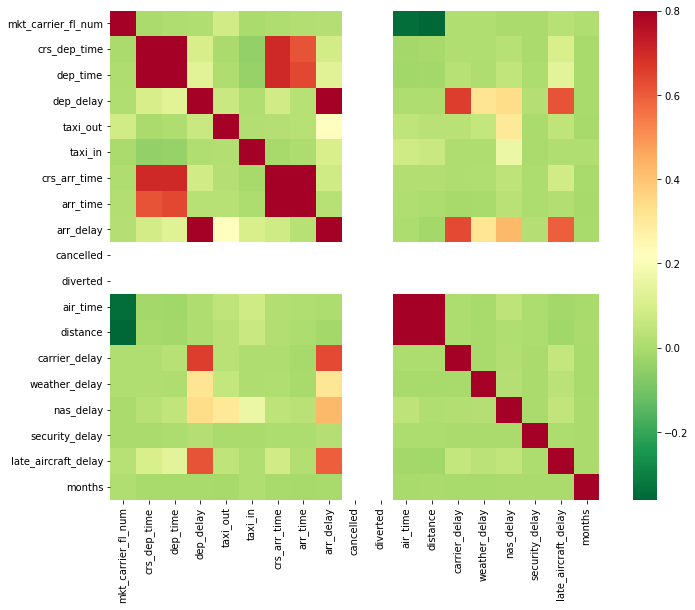

In [381]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")